In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\Masterpiece By Nickopusan\Document\penguins.csv")
df.isnull().sum()

id                    0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [4]:
# Fill missing values with the mean of the respective columns
df.fillna(df.mean(numeric_only=True), inplace=True)

# For categorical columns, you can fill missing values with the mode
df['sex'].fillna(df['sex'].mode()[0], inplace=True)

# Round numerical columns to two decimal places
df = df.round(1)


In [5]:
df_test = df.copy()

encoder = LabelEncoder()
df_test['species'] = encoder.fit_transform(df_test['species'])
df_test['island'] = encoder.fit_transform(df_test['island'])
df_test['sex'] = encoder.fit_transform(df_test['sex'])


In [6]:
df_test.describe()

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,171.500000,0.918605,0.662791,43.921802,17.151453,200.915116,4201.754651,0.520349,2008.029070
std,99.448479,0.893320,0.726194,5.443644,1.969031,14.020658,799.613058,0.500313,0.818356
min,0.000000,0.000000,0.000000,32.100000,13.100000,172.000000,2700.000000,0.000000,2007.000000
25%,85.750000,0.000000,0.000000,39.275000,15.600000,190.000000,3550.000000,0.000000,2007.000000
50%,171.500000,1.000000,1.000000,44.250000,17.300000,197.000000,4050.000000,1.000000,2008.000000
75%,257.250000,2.000000,1.000000,48.500000,18.700000,213.000000,4750.000000,1.000000,2009.000000
max,343.000000,2.000000,2.000000,59.600000,21.500000,231.000000,6300.000000,1.000000,2009.000000


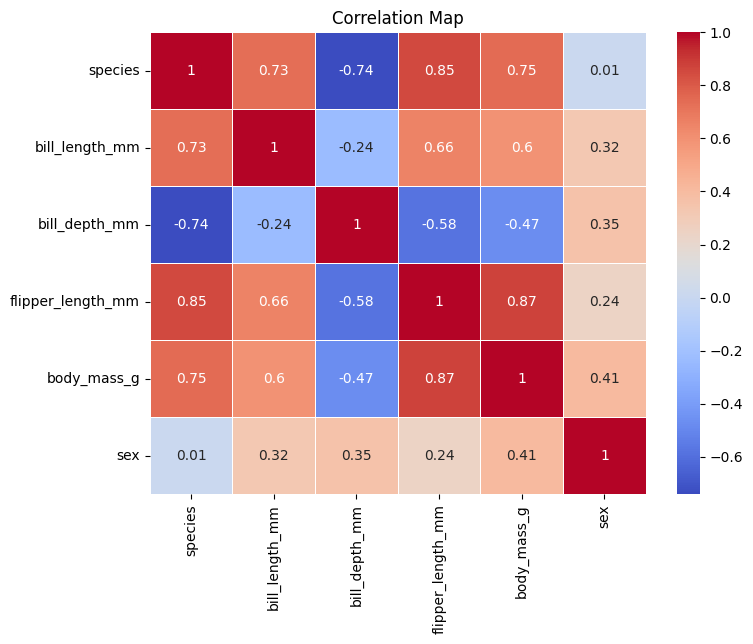

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(df_test.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Map")
plt.show()

<Figure size 1000x600 with 0 Axes>

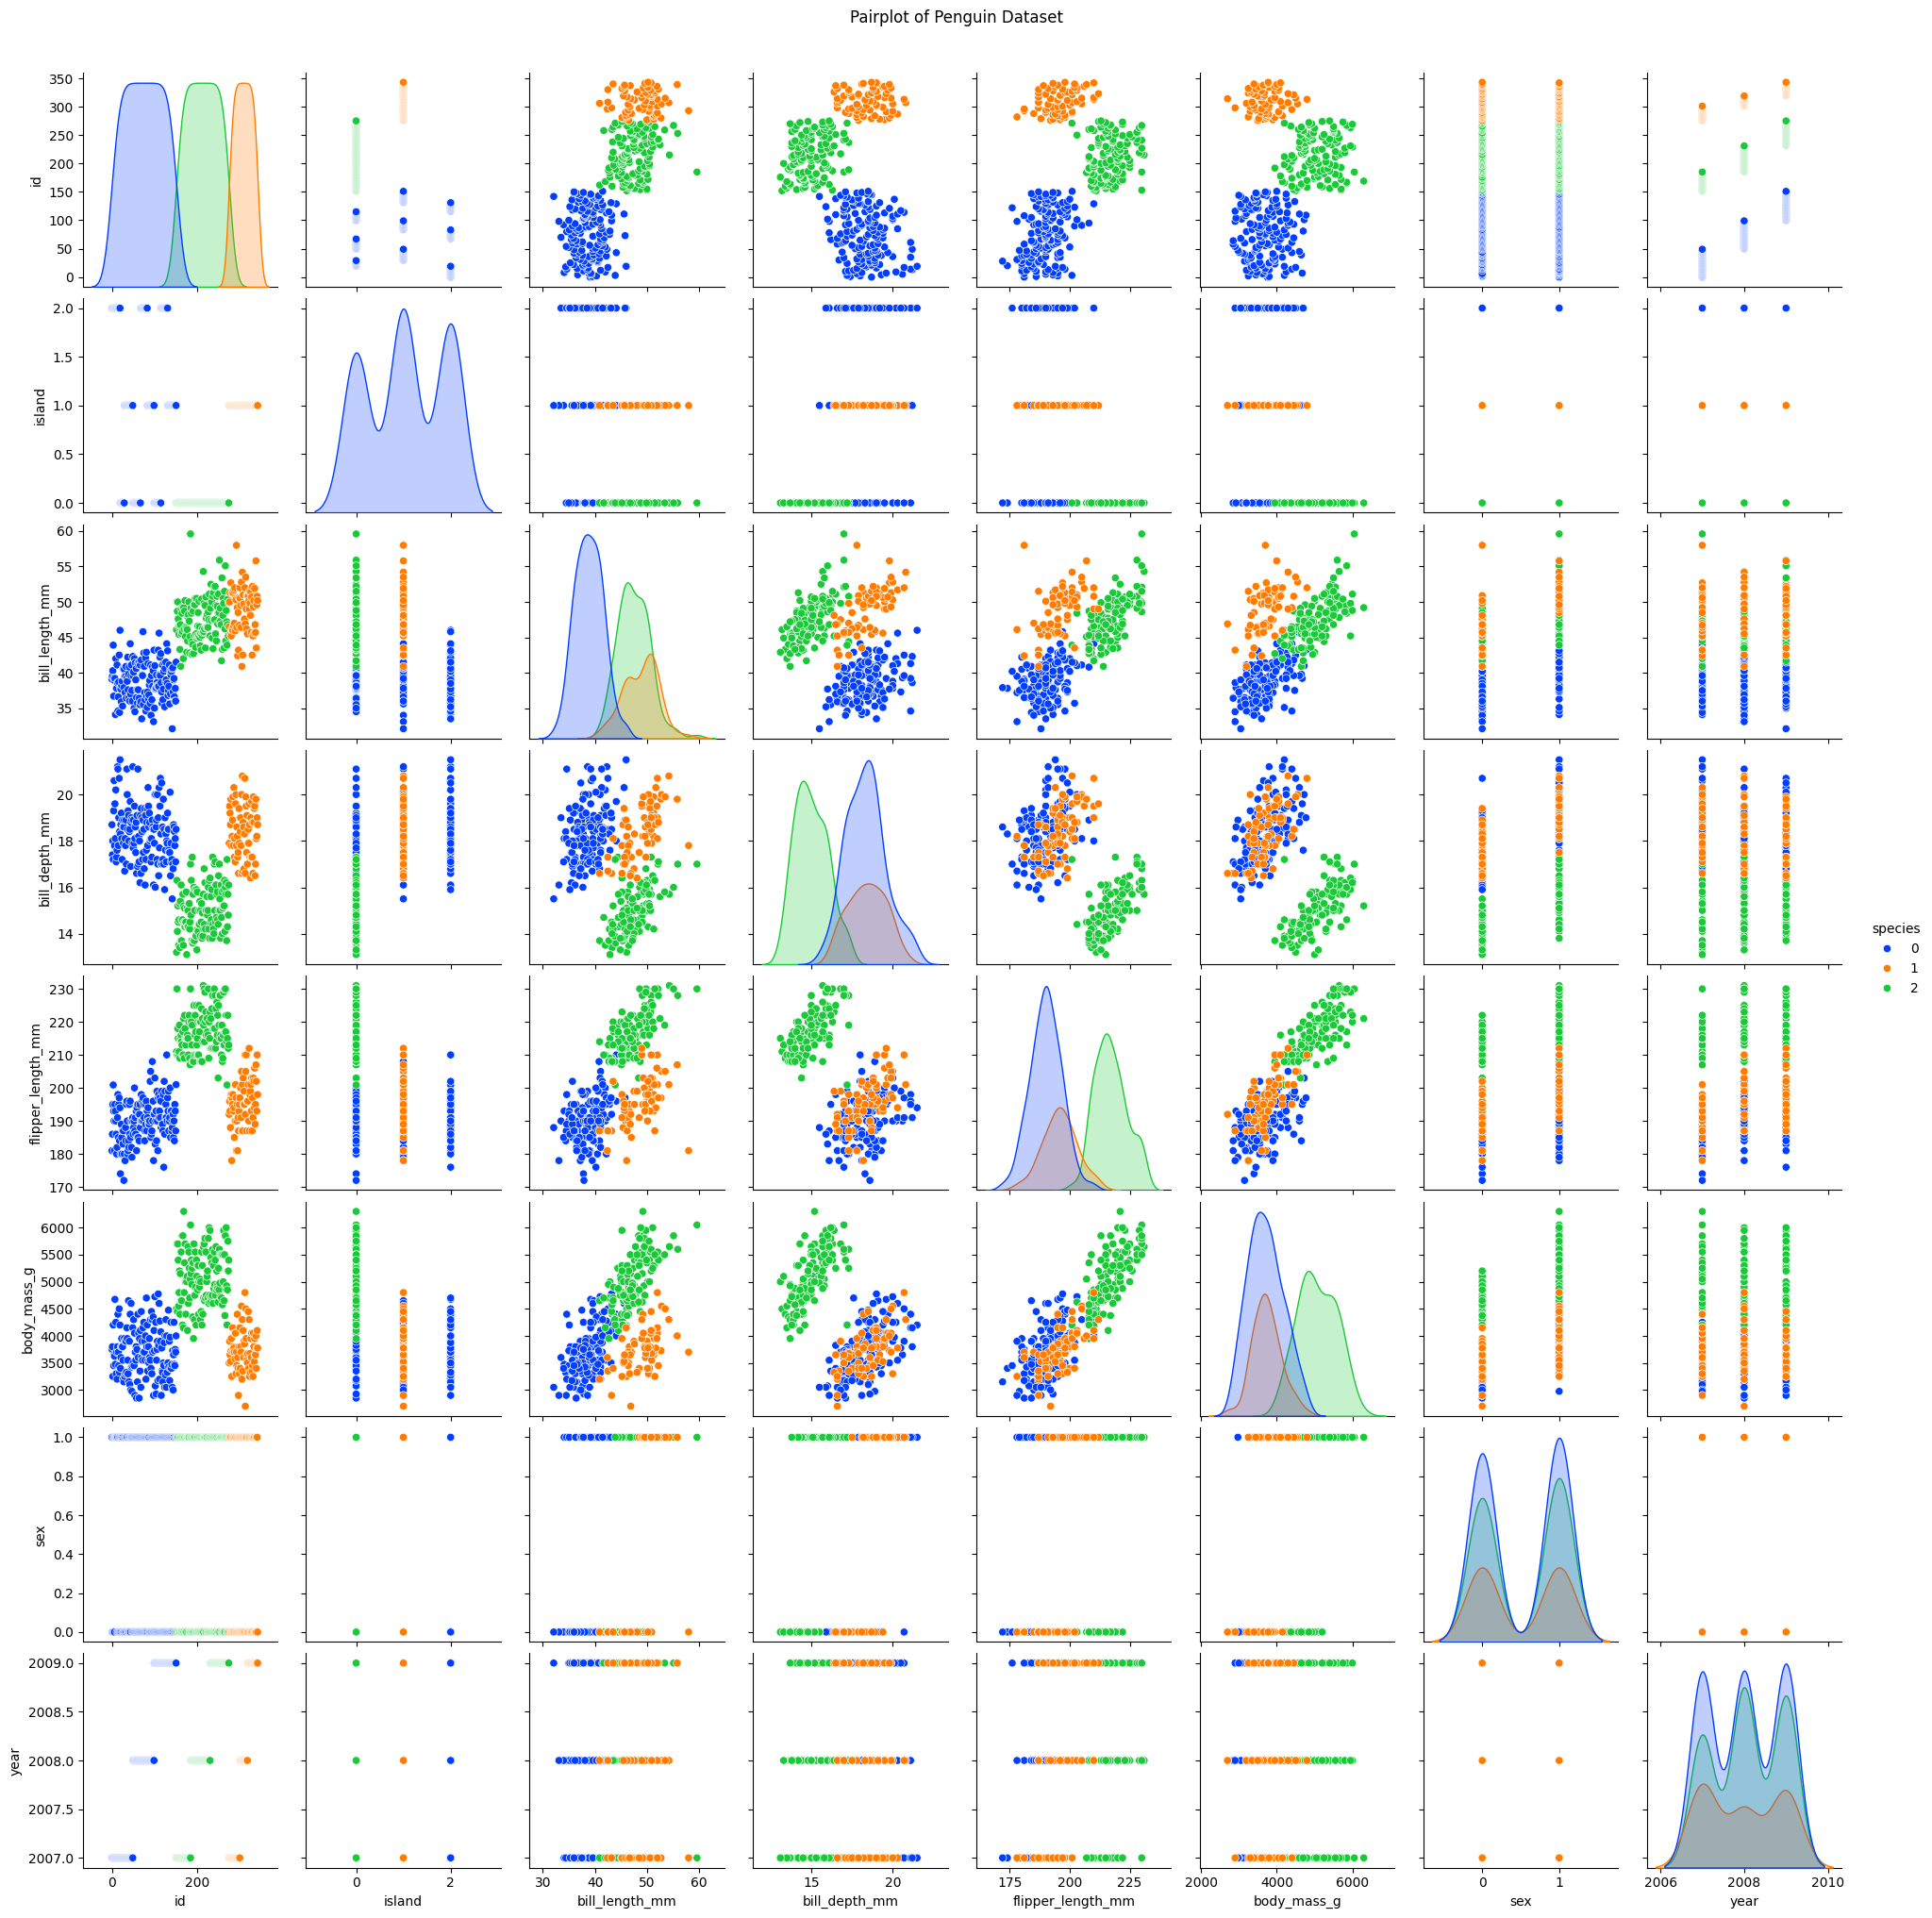

In [8]:
plt.figure(figsize=(10,6))
sns.pairplot(df_test, hue="species", palette="bright")
plt.suptitle("Pairplot of Penguin Dataset", y=1.02)
plt.show()

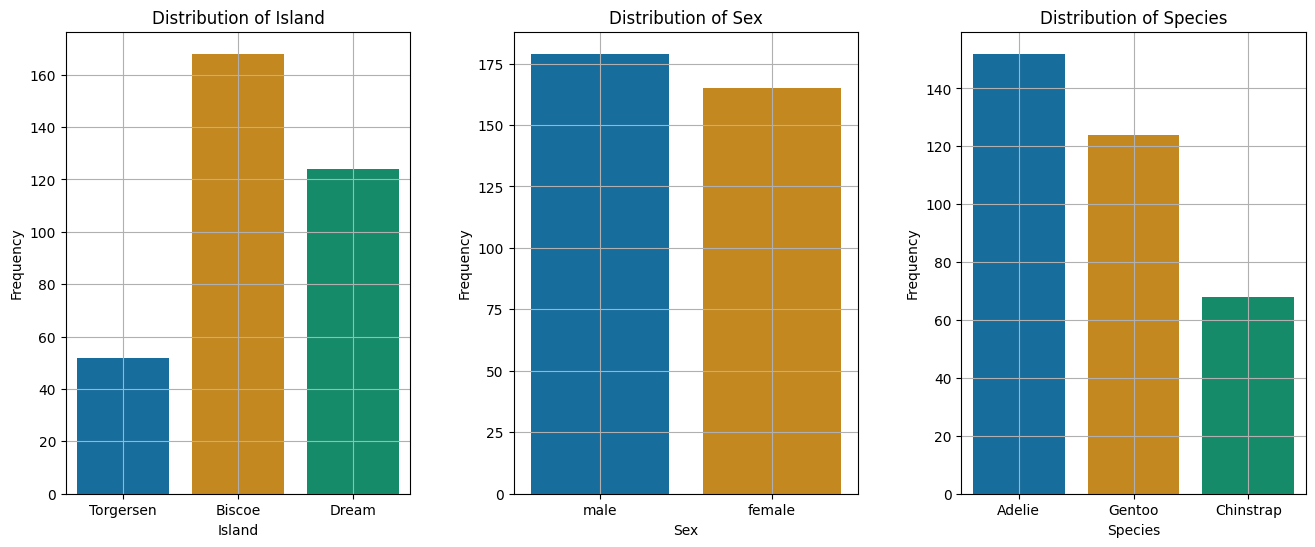

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

# Distribution of Island
sns.countplot(data=df, x='island', palette='colorblind', ax=axes[0])
axes[0].set_title("Distribution of Island")
axes[0].set_xlabel("Island")
axes[0].set_ylabel("Frequency")
axes[0].grid(True)

# Distribution of Sex
sns.countplot(data=df, x='sex', palette='colorblind', ax=axes[1])
axes[1].set_title("Distribution of Sex")
axes[1].set_xlabel("Sex")
axes[1].set_ylabel("Frequency")
axes[1].grid(True)

# Distribution of Species
sns.countplot(data=df, x='species', palette='colorblind', ax=axes[2])
axes[2].set_title("Distribution of Species")
axes[2].set_xlabel("Species")
axes[2].set_ylabel("Frequency")
axes[2].grid(True)

plt.subplots_adjust(wspace=0.3)
plt.show()

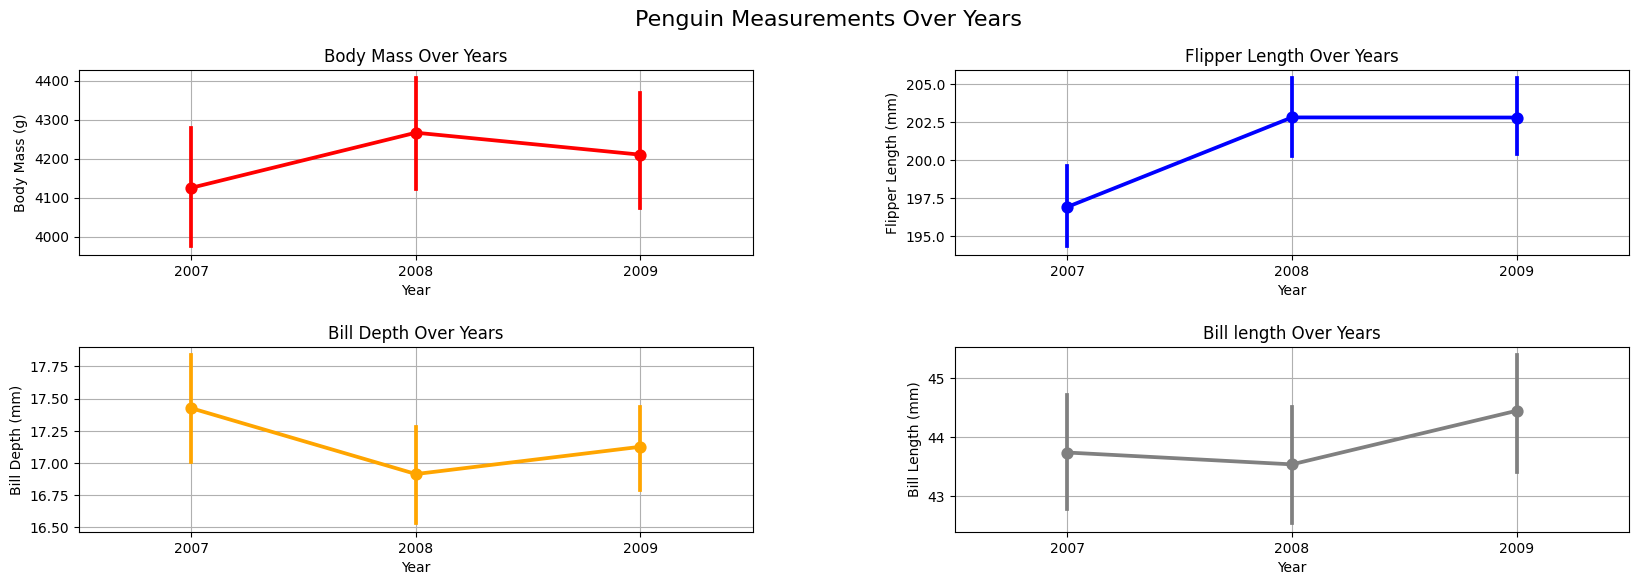

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(20, 6))

# Body Mass Over Years
sns.pointplot(data=df, x='year', y='body_mass_g', color='red', ax=axes[0,0])
axes[0,0].set_title('Body Mass Over Years')
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Body Mass (g)')
axes[0,0].grid(True)

# Flipper Length Over Years
sns.pointplot(data=df, x='year', y='flipper_length_mm', color='blue', ax=axes[0,1])
axes[0,1].set_title("Flipper Length Over Years")
axes[0,1].set_xlabel("Year")
axes[0,1].set_ylabel("Flipper Length (mm)")
axes[0,1].grid(True)

# Bill Depth Over Years
sns.pointplot(data=df, x='year', y='bill_depth_mm', color='orange', ax=axes[1,0])
axes[1,0].set_title("Bill Depth Over Years")
axes[1,0].set_xlabel("Year")
axes[1,0].set_ylabel("Bill Depth (mm)")
axes[1,0].grid(True)

# Bill Length Over Years
sns.pointplot(data=df, x='year', y='bill_length_mm', color='gray', ax=axes[1,1])
axes[1,1].set_title("Bill length Over Years")
axes[1,1].set_xlabel("Year")
axes[1,1].set_ylabel("Bill Length (mm)")
axes[1,1].grid(True)

fig.suptitle('Penguin Measurements Over Years', fontsize=16)
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()


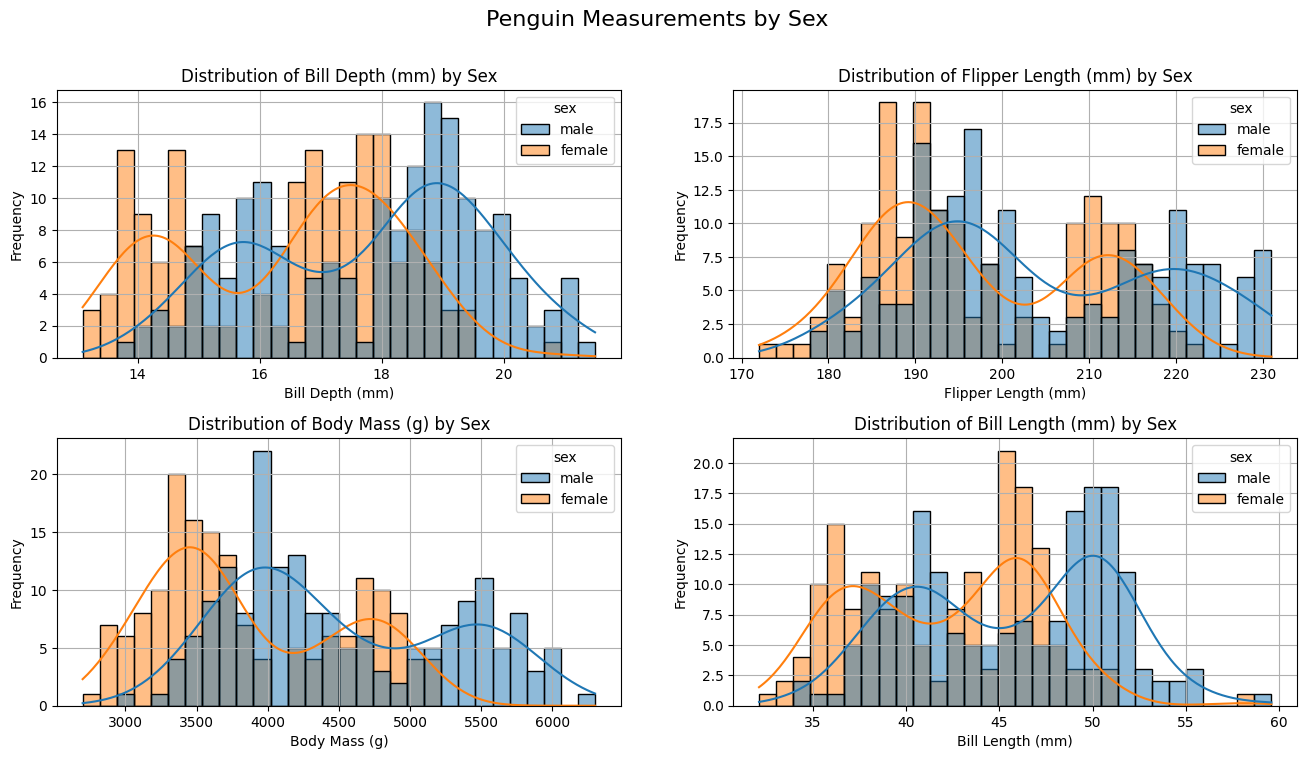

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

# Distribution of Bill Depth by Sex
sns.histplot(data=df, x='bill_depth_mm', hue='sex', kde=True, bins=30, ax=axes[0,0])
axes[0,0].set_title('Distribution of Bill Depth (mm) by Sex')
axes[0,0].set_xlabel('Bill Depth (mm)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].grid(True)

# Distribution of Bill Length by Sex
sns.histplot(data=df, x='bill_length_mm', hue='sex', kde=True, bins=30, ax=axes[1,1])
axes[1,1].set_title("Distribution of Bill Length (mm) by Sex")
axes[1,1].set_xlabel("Bill Length (mm)")
axes[1,1].set_ylabel("Frequency")
axes[1,1].grid(True)

# Distribution of Flipper Length
sns.histplot(data=df, x='flipper_length_mm', hue='sex', kde=True, bins=30, ax=axes[0,1])
axes[0,1].set_title("Distribution of Flipper Length (mm) by Sex")
axes[0,1].set_xlabel("Flipper Length (mm)")
axes[0,1].set_ylabel("Frequency")
axes[0,1].grid(True)

# Distribution of Body Mass
sns.histplot(data=df, x='body_mass_g', hue='sex', kde=True, bins=30, ax=axes[1,0])
axes[1,0].set_title("Distribution of Body Mass (g) by Sex")
axes[1,0].set_xlabel("Body Mass (g)")
axes[1,0].set_ylabel("Frequency")
axes[1,0].grid(True)

fig.suptitle('Penguin Measurements by Sex', fontsize=16)
plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.show()

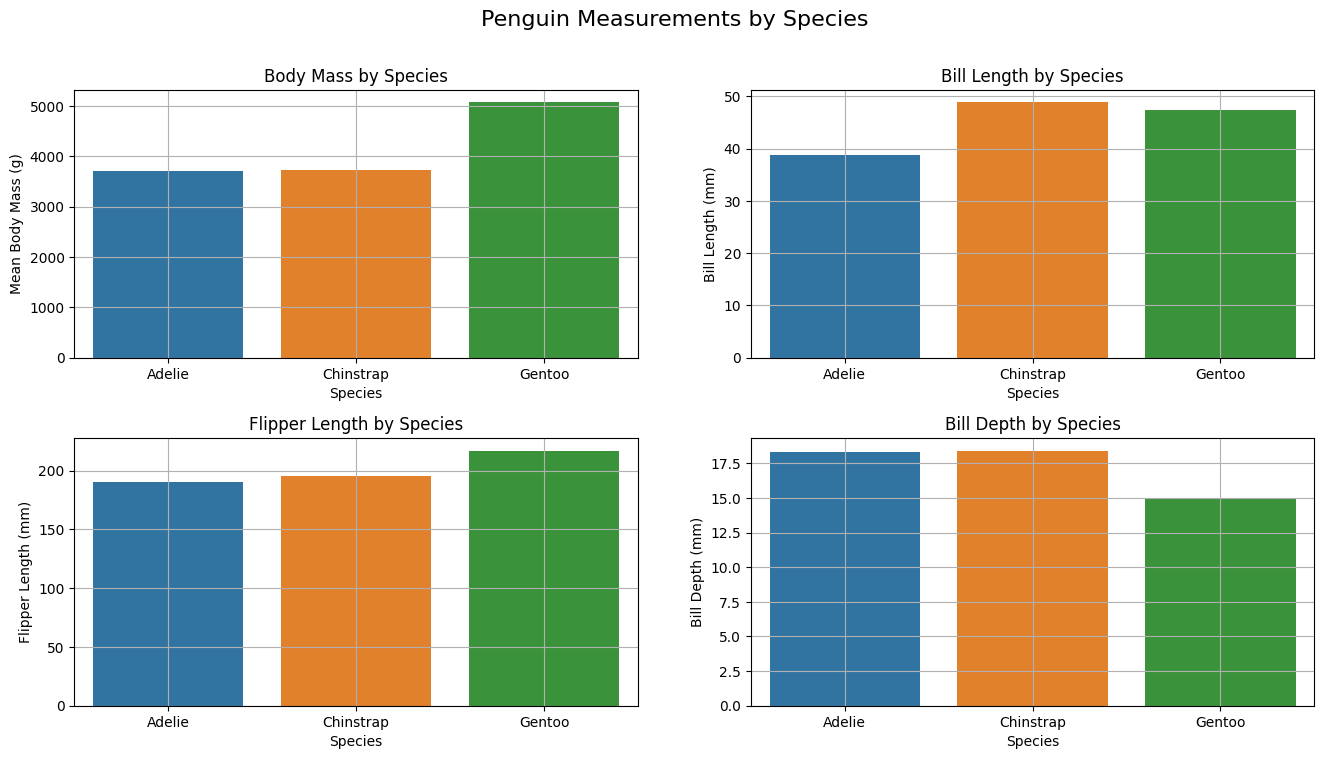

In [12]:
mean_per_species = df.groupby('species').mean(numeric_only=True).reset_index()
fig, axes = plt.subplots(2,2, figsize=(16,8))

# Body Mass by Species
sns.barplot(data=mean_per_species, x='species', y='body_mass_g', hue='species', ax=axes[0,0])
axes[0,0].set_title('Body Mass by Species')
axes[0,0].set_xlabel('Species')
axes[0,0].set_ylabel('Mean Body Mass (g)')
axes[0,0].grid(True)

# Bill Length by Species
sns.barplot(data=mean_per_species, x='species', y='bill_length_mm', hue='species', ax=axes[0,1])
axes[0,1].set_title('Bill Length by Species')
axes[0,1].set_xlabel('Species')
axes[0,1].set_ylabel('Bill Length (mm)')
axes[0,1].grid(True)

# Bill Depth by Species
sns.barplot(data=mean_per_species, x='species', y='bill_depth_mm', hue='species', ax=axes[1,1])
axes[1,1].set_title('Bill Depth by Species')
axes[1,1].set_xlabel('Species')
axes[1,1].set_ylabel('Bill Depth (mm)')
axes[1,1].grid(True)

# Flipper Length by Species
sns.barplot(data=mean_per_species, x='species', y='flipper_length_mm', hue='species', ax=axes[1,0])
axes[1,0].set_title('Flipper Length by Species')
axes[1,0].set_xlabel('Species')
axes[1,0].set_ylabel('Flipper Length (mm)')
axes[1,0].grid(True)

fig.suptitle('Penguin Measurements by Species', fontsize=16)
plt.subplots_adjust(hspace=0.3, wspace=0.2)
plt.show()

In [13]:
df_test = df_test.drop(columns=['island', 'id', 'year'])

In [14]:
train, temp = train_test_split(df_test, test_size=0.4, random_state=42, stratify=df_test['species'])
test, valid = train_test_split(temp, test_size=0.5, random_state=42, stratify=temp['species'])

In [15]:
def scale_dataset(dataframe, oversample=False):
    x = dataframe.drop(columns=['species'])
    y = dataframe['species']
    
    scaler = StandardScaler() 
    x = scaler.fit_transform(x)
    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x, y)
    data = np.hstack((x, np.reshape(y.values, (-1, 1))))
    return data, x, y

In [16]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

In [17]:
print(f"Adelie:{sum(y_train == 0)}")
print(f"Gentoo:{sum(y_train == 2)}")
print(f"Chinstarp:{sum(y_train == 1)}")

Adelie:91
Gentoo:91
Chinstarp:91


In [18]:
forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(x_train, y_train)
y_pred = forest_model.predict(x_test)

In [19]:
scores = cross_val_score(forest_model, x_train, y_train, cv=5)
print("Cross-Validation Scores:")
for i, score in enumerate(scores, 1):
    print(f"Fold {i}: {score:.4f}")
print(f"\nMean CV Score: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")

Cross-Validation Scores:
Fold 1: 0.9636
Fold 2: 1.0000
Fold 3: 1.0000
Fold 4: 0.9815
Fold 5: 1.0000

Mean CV Score: 0.9890
Standard Deviation: 0.0146


In [20]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n ", classification_report(y_test, y_pred))

Accuracy Score:  1.0
Classification Report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        25

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



In [21]:
importances = forest_model.feature_importances_
feature_names = df_test.drop(columns=['species']).columns
feature_importance = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

for feature, importance in feature_importance:
    print(f"{feature}: {importance:.4f}")

bill_length_mm: 0.3523
flipper_length_mm: 0.2718
bill_depth_mm: 0.2420
body_mass_g: 0.1198
sex: 0.0141
